# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

Probando a ver si conecta
 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, how="left", on =["Mouse ID","Mouse ID"])

# Display the data table for preview
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
#1. Calculate the number of unique mouse
unique_mice = len(combined_data_df["Mouse ID"].unique())
unique_mice


249

In [3]:
#2. Check if the data has any dupplicates for later deletion
duplicate_data= combined_data_df[combined_data_df.duplicated()]
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_df.loc[combined_data_df["Mouse ID"] == "g989",:]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate ID mouse.
cleaned_data_df = combined_data_df.drop(combined_data_df[combined_data_df["Mouse ID"] == "g989"].index)
cleaned_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
#Confirm that the dataframe is clean that deleted the mouse that was duplicated
unique_mice = len(cleaned_data_df["Mouse ID"].unique())
unique_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_mean = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_regimen_median = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_regimen_var = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_regimen_stnd_var = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_regimen_sem = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Create a new dataframe with the statistics calculated above.
summary = pd.concat([drug_regimen_mean, drug_regimen_median, drug_regimen_var, drug_regimen_stnd_var, drug_regimen_sem], axis=1)

#Change the titles of each column as requested in the challenge.
summary.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.",
                                    "Tumor Volume Std. Err."]
#making sure the columns were correctly renamed.
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:

# Using the aggregation method, produce the same summary statistics in a single line
agg_columns = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# # Assemble the resulting series into a single summary DataFrame.
agg_columns

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

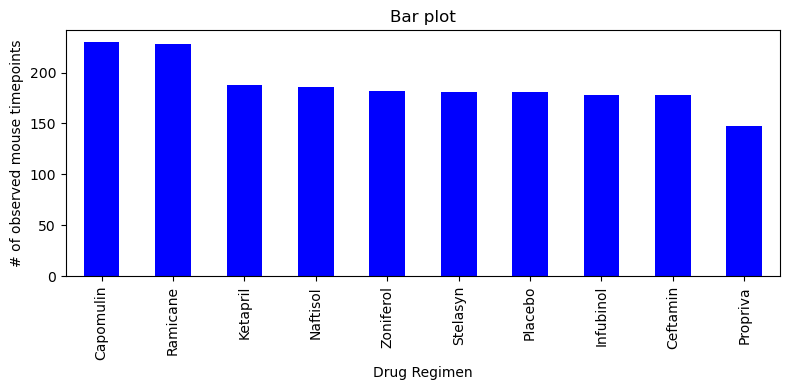

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Get total mice per regimen
drug_data = cleaned_data_df["Drug Regimen"].value_counts()

#Configure plot, figsize, title, and axis labels
figure1 = drug_data.plot(kind="bar", facecolor="blue", figsize=(8,4),
                                title="Bar plot",
                                xlabel="Drug Regimen",
                                ylabel="# of observed mouse timepoints")

#making sure that the graph is appearing correctly with the given space.
plt.tight_layout()
plt.show()


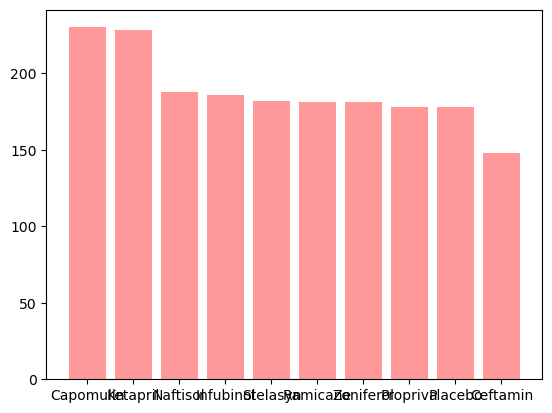

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#data set
x_drugs = cleaned_data_df["Drug Regimen"].unique()
y_mice = drug_data

# Creating bar chart using pyplot
plt.bar(x_drugs, y_mice, facecolor="red", alpha=0.40, align="center")

plt.tight_layout
plt.show()
####### Check how to change the position of the labels
# plt.show()
# Configure x-tick rotation
# xticklabels = compare_all_national_df.index
# figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

Text(0, 0.5, 'Sex')

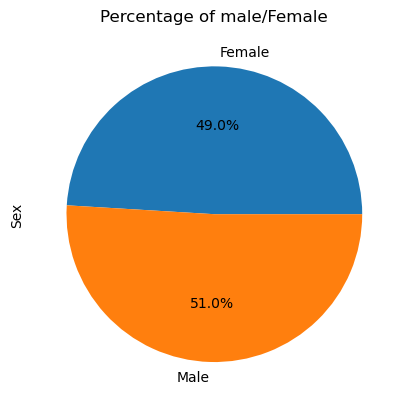

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Split up our data into groups based on mouse gender (Female, Male)
mouse_gender = cleaned_data_df.groupby(["Sex"])["Mouse ID"].count()

#Format the pie chart to display
pie_chart = mouse_gender.plot(kind="pie", y="Sex", title="Percentage of male/Female",autopct="%.1f%%")
pie_chart.set_ylabel("Sex")



Text(0.5, 1.0, 'Percentage of Male and Female mice in the study')

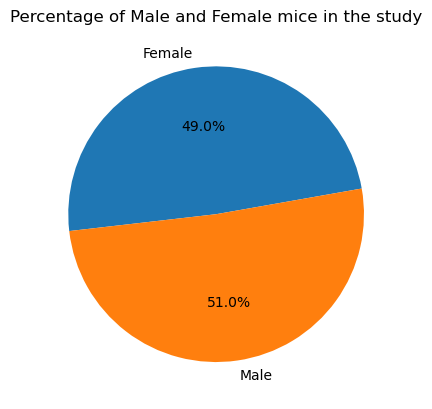

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Creating a variable for gender
gender=["Female", "Male"]

#Format the pie chart to display
plt.pie(mouse_gender, labels= gender, autopct="%1.1f%%", startangle= 10)
plt.title("Percentage of Male and Female mice in the study")

In [13]:
cleaned_data_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and CeftaminDrug Regimen


# Start by getting the last (greatest) timepoint for each mouse for Capomulin
capomulin_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Capomulin"]
capomulin_max_timepoint = capomulin_df.groupby(["Mouse ID"])["Timepoint"].max()

# capomulin_max_tumorvol = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].max()
# capomulin_max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [43]:
# Start by getting the last (greatest) timepoint for each mouse for Ramicane
ramicane_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Ramicane"]
ramicane_max_timepoint = ramicane_df.groupby(["Mouse ID"])["Timepoint"].max()

In [44]:
# Start by getting the last (greatest) timepoint for each mouse for Infubinol
infubinol_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Ramicane"]
infubinol_max_timepoint = infubinol_df.groupby(["Mouse ID"])["Timepoint"].max()

In [ ]:
# Start by getting the last (greatest) timepoint for each mouse for Infubinol
infubinol_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Ramicane"]
infubinol_max_timepoint = infubinol_df.groupby(["Mouse ID"])["Timepoint"].max()

In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

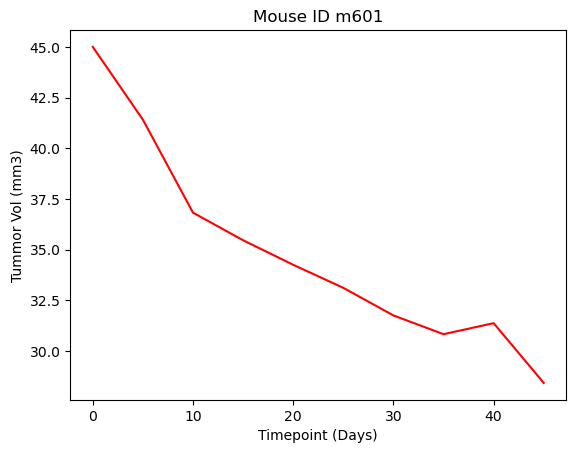

In [56]:
# Generate a line plot of tumor volume vs. time point for mouse m601 treated with Capomulin
capomulin_mousem601 = capomulin_df.loc[capomulin_df["Mouse ID"]=="m601"]
x_timepoints = capomulin_mousem601["Timepoint"]
y_tumorvol = capomulin_mousem601["Tumor Volume (mm3)"]
plt.plot(x_timepoints, y_tumorvol, color="red")
plt.title("Mouse ID m601")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tummor Vol (mm3)")
plt.show()

# plt.show()

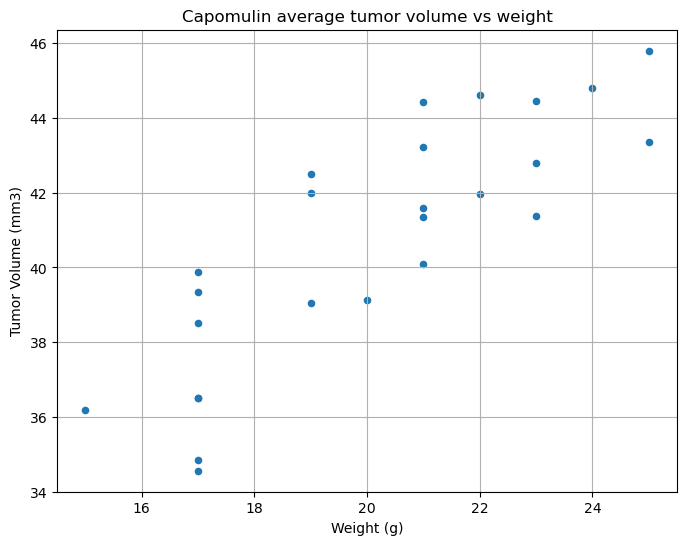

In [57]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimenca
# Bringin the weight by mouse using Capomulin
capomulin_ave_weight = capomulin_df.groupby(["Mouse ID"])["Weight (g)"].mean()

#Calculate hte average Tummor Volume in mm3 by mouse using Capomulin
capomulin_ave_tumor = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

#Create a single dataframe with the results above to be able to draft a scatter plot
capomulin_ave_tumor_weight = pd.concat([capomulin_ave_weight,capomulin_ave_tumor],axis=1)

#Formulate the Scatter plot.
scatter_plot_capomulin =capomulin_ave_tumor_weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,6), title="Capomulin average tumor volume vs weight")



## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
scatter_plot_capomulin



<Axes: title={'center': 'Capomulin average tumor volume vs weight'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

In [ ]:
# x_values = capomulin_ave_tumor_weight['Weight (g)']
# y_values = data['1Y_Disease_Progress']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.xlabel('Normalized Blood Pressure')
# plt.ylabel('1Y_Disease_Progress')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()